## Homework - Unsupervised

Kelompok 2:

*   Oei, Gabrielle Maureen B.S
*   Ummi Sarah
*   Arini Arumsari
*   Althaaf Athaayaa Daffa Qushayyizidane
*   Ruslan Hadi
*   Muhammad Ikhsan Hendriyana
*   Taufik Ismail
*   Jackson
*   Tsany Sutia

In [1]:
# Melakukan import library
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from matplotlib import rcParams
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# import gdown

print('numpy version : ',np.__version__)
print('pandas version : ',pd.__version__)
print('seaborn version : ',sns.__version__)

numpy version :  1.23.5
pandas version :  1.5.3
seaborn version :  0.12.2


In [2]:
sns.set(rc={'figure.figsize':(20.7,8.27)})
sns.set_style("whitegrid")
sns.color_palette("dark")
plt.style.use("fivethirtyeight")

In [3]:
# Melakukan import csv
df = pd.read_csv("flight.csv")
df.sample(5)

MEMBER_NO    FFP_DATE FIRST_FLIGHT_DATE GENDER  FFP_TIER WORK_CITY  \
38068      46223    5/1/2007         6/26/2007   Male         4   beijing   
35736      30566  11/26/2008          3/2/2011   Male         4  shenzhen   
4415       59208   6/15/2011         6/15/2011   Male         4  shanghai   
58191      14305    4/8/2011         5/11/2011   Male         4    zhuhai   
28907      46589   5/13/2011         4/10/2012   Male         4   nanjing   

        WORK_PROVINCE WORK_COUNTRY   AGE  LOAD_TIME  ...  SUM_YR_2  \
38068         beijing           CN  39.0  3/31/2014  ...    1966.0   
35736       guangdong           CN  32.0  3/31/2014  ...    1873.0   
4415         shanghai           CN  30.0  3/31/2014  ...    9986.0   
58191       guangdong           CN  47.0  3/31/2014  ...       0.0   
28907  jiangsunanjing           CN  31.0  3/31/2014  ...    2175.0   

       SEG_KM_SUM  LAST_FLIGHT_DATE  LAST_TO_END  AVG_INTERVAL MAX_INTERVAL  \
38068        7096         3/10/2014           22    189.666667          301   
35736        6737         9/21/2013          193    154.666667          376   
4415        47906        12/10/2013          113     14.027027           54   
58191        2378         7/15/2012          626     17.000000           17   
28907       13408         3/11/2014           21     46.733333          324   

       EXCHANGE_COUNT  avg_discount  Points_Sum  Point_NotFlight  
38068               1      0.718171        5241               19  
35736               0      0.846619        6365                1  
4415                1      0.762892       46833               26  
58191               0      0.650000        1551                0  
28907               0      0.587531       12059               20  

[5 rows x 23 columns]

# Describe Data

In [4]:
# Mengecek datatype dari masing-masing kolom
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62988 entries, 0 to 62987
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MEMBER_NO          62988 non-null  int64  
 1   FFP_DATE           62988 non-null  object 
 2   FIRST_FLIGHT_DATE  62988 non-null  object 
 3   GENDER             62985 non-null  object 
 4   FFP_TIER           62988 non-null  int64  
 5   WORK_CITY          60719 non-null  object 
 6   WORK_PROVINCE      59740 non-null  object 
 7   WORK_COUNTRY       62962 non-null  object 
 8   AGE                62568 non-null  float64
 9   LOAD_TIME          62988 non-null  object 
 10  FLIGHT_COUNT       62988 non-null  int64  
 11  BP_SUM             62988 non-null  int64  
 12  SUM_YR_1           62437 non-null  float64
 13  SUM_YR_2           62850 non-null  float64
 14  SEG_KM_SUM         62988 non-null  int64  
 15  LAST_FLIGHT_DATE   62988 non-null  object 
 16  LAST_TO_END        629

**Observasi =**

* Dataframe terdiri dari 23 kolom dan 62988 baris.
* Dataframe memiliki kolom dengan 8 kategorikal, dan 15 numerikal.
* Terdapat 4 kolom yang seharusnya merupakan datetime yaitu FFP_DATE, FIRST_FLIGHT_DATE, LOAD_TIME, LAST_FLIGHT_DATE.

In [5]:
from datetime import datetime
# df_date = ['FFP_DATE', 'FIRST_FLIGHT_DATE', 'LOAD_TIME', 'LAST_FLIGHT_DATE']
# date = [datetime.strptime(date, '%m-%d-%Y').date() for date in df_date]

df['FFP_DATE'] = pd.to_datetime(df['FFP_DATE'])
df['FIRST_FLIGHT_DATE'] = pd.to_datetime(df['FIRST_FLIGHT_DATE'])
df['LOAD_TIME'] = pd.to_datetime(df['LOAD_TIME'])
#df['LAST_FLIGHT_DATE'] = pd.to_datetime(df['LAST_FLIGHT_DATE'])   #pada thn 2014 hanya 28 hari, sedangkan di data terdapat tanggal 29
df

MEMBER_NO   FFP_DATE FIRST_FLIGHT_DATE  GENDER  FFP_TIER    WORK_CITY  \
0          54993 2006-11-02        2008-12-24    Male         6            .   
1          28065 2007-02-19        2007-08-03    Male         6          NaN   
2          55106 2007-02-01        2007-08-30    Male         6            .   
3          21189 2008-08-22        2008-08-23    Male         5  Los Angeles   
4          39546 2009-04-10        2009-04-15    Male         6      guiyang   
...          ...        ...               ...     ...       ...          ...   
62983      18375 2011-05-20        2013-06-05  Female         4    guangzhou   
62984      36041 2010-03-08        2013-09-14    Male         4       foshan   
62985      45690 2006-03-30        2006-12-02  Female         4    guangzhou   
62986      61027 2013-02-06        2013-02-14  Female         4    guangzhou   
62987      61340 2013-02-17        2013-02-17  Female         4     shanghai   

      WORK_PROVINCE WORK_COUNTRY   AGE  LOAD_TIME  ...  SUM_YR_2  SEG_KM_SUM  \
0           beijing           CN  31.0 2014-03-31  ...  234188.0      580717   
1           beijing           CN  42.0 2014-03-31  ...  167434.0      293678   
2           beijing           CN  40.0 2014-03-31  ...  164982.0      283712   
3                CA           US  64.0 2014-03-31  ...  125500.0      281336   
4           guizhou           CN  48.0 2014-03-31  ...  130702.0      309928   
...             ...          ...   ...        ...  ...       ...         ...   
62983     guangdong           CN  25.0 2014-03-31  ...       0.0        1134   
62984     guangdong           CN  38.0 2014-03-31  ...       0.0        8016   
62985     guangdong           CN  43.0 2014-03-31  ...       0.0        2594   
62986     guangdong           CN  36.0 2014-03-31  ...       0.0        3934   
62987             .           CN  29.0 2014-03-31  ...       0.0        4222   

       LAST_FLIGHT_DATE  LAST_TO_END  AVG_INTERVAL MAX_INTERVAL  \
0             3/31/2014            1      3.483254           18   
1             3/25/2014            7      5.194245           17   
2             3/21/2014           11      5.298507           18   
3            12/26/2013           97     27.863636           73   
4             3/27/2014            5      4.788079           47   
...                 ...          ...           ...          ...   
62983          6/9/2013          297      4.000000            4   
62984          1/3/2014           89     37.000000           60   
62985          3/3/2014           29    166.000000          166   
62986         2/26/2013          400     12.000000           12   
62987         2/23/2013          403      6.000000            6   

       EXCHANGE_COUNT  avg_discount  Points_Sum  Point_NotFlight  
0                  34      0.961639      619760               50  
1                  29      1.252314      415768               33  
2                  20      1.254676      406361               26  
3                  11      1.090870      372204               12  
4                  27      0.970658      338813               39  
...               ...           ...         ...              ...  
62983               1      0.000000       12318               22  
62984              14      0.000000      106972               43  
62985               0      0.000000           0                0  
62986               0      0.000000           0                0  
62987               0      0.000000           0                0  

[62988 rows x 23 columns]

Merubah tipe data 4 kolom yaitu kolom FFP_DATE, FIRST_FLIGHT_DATE, LOAD_TIME, LAST_FLIGHT_DATE menajdi datatime

In [6]:
# Melihat jumlah baris dan kolom
test = df.shape[0]

# Mengecek missing value ditiap fitur
missing_values_count = df.isnull().sum()
missing_values_count

MEMBER_NO               0
FFP_DATE                0
FIRST_FLIGHT_DATE       0
GENDER                  3
FFP_TIER                0
WORK_CITY            2269
WORK_PROVINCE        3248
WORK_COUNTRY           26
AGE                   420
LOAD_TIME               0
FLIGHT_COUNT            0
BP_SUM                  0
SUM_YR_1              551
SUM_YR_2              138
SEG_KM_SUM              0
LAST_FLIGHT_DATE        0
LAST_TO_END             0
AVG_INTERVAL            0
MAX_INTERVAL            0
EXCHANGE_COUNT          0
avg_discount            0
Points_Sum              0
Point_NotFlight         0
dtype: int64

Terdapat 7 kolom missing valuu yaitu Gender 3 baris, work_city 2269 baris, work_province 3248 baris, work_country 26 baris, age 420 baris, sum_yr_1 551 baris dan sum_yr_2 138 baris.

In [7]:
# Pengelompokan kolom berdasarkan jenisnya
num = ['int64', 'int32', 'int16', 'float64', 'float32', 'float16']
num = df.select_dtypes(include=num)
num.drop(columns=['MEMBER_NO'], inplace=True)
num = num.columns
cats = ['object', 'bool']
cats = df.select_dtypes(include=cats)
cats = cats.columns

timestamp = ['FFP_DATE', 'FIRST_FLIGHT_DATE', 'LOAD_TIME']


In [8]:
df[num].describe()

FFP_TIER           AGE  FLIGHT_COUNT         BP_SUM       SUM_YR_1  \
count  62988.000000  62568.000000  62988.000000   62988.000000   62437.000000   
mean       4.102162     42.476346     11.839414   10925.081254    5355.376064   
std        0.373856      9.885915     14.049471   16339.486151    8109.450147   
min        4.000000      6.000000      2.000000       0.000000       0.000000   
25%        4.000000     35.000000      3.000000    2518.000000    1003.000000   
50%        4.000000     41.000000      7.000000    5700.000000    2800.000000   
75%        4.000000     48.000000     15.000000   12831.000000    6574.000000   
max        6.000000    110.000000    213.000000  505308.000000  239560.000000   

            SUM_YR_2     SEG_KM_SUM   LAST_TO_END  AVG_INTERVAL  MAX_INTERVAL  \
count   62850.000000   62988.000000  62988.000000  62988.000000  62988.000000   
mean     5604.026014   17123.878691    176.120102     67.749788    166.033895   
std      8703.364247   20960.844623    183.822223     77.517866    123.397180   
min         0.000000     368.000000      1.000000      0.000000      0.000000   
25%       780.000000    4747.000000     29.000000     23.370370     79.000000   
50%      2773.000000    9994.000000    108.000000     44.666667    143.000000   
75%      6845.750000   21271.250000    268.000000     82.000000    228.000000   
max    234188.000000  580717.000000    731.000000    728.000000    728.000000   

       EXCHANGE_COUNT  avg_discount   Points_Sum  Point_NotFlight  
count    62988.000000  62988.000000   62988.0000     62988.000000  
mean         0.319775      0.721558   12545.7771         2.728155  
std          1.136004      0.185427   20507.8167         7.364164  
min          0.000000      0.000000       0.0000         0.000000  
25%          0.000000      0.611997    2775.0000         0.000000  
50%          0.000000      0.711856    6328.5000         0.000000  
75%          0.000000      0.809476   14302.5000         1.000000  
max         46.000000      1.500000  985572.0000       140.000000

**Observasi =**

Numerikal
* FFP_TIER: antara mean dan median terdapat sedikit sekali selisih kemungkinan masih terdistribusi normal.
* AGE: antara mean dan median terdapat sedikit sekali selisih kemungkinan masih terdistribusi normal.
* FLIGHT_COUNT: mean > median, *positive skewed*.
* BP_SUM: mean > median, *positive skewed*.
* SUM_YR_1: mean > median, *positive skewed*.
* SUM_YR_2: mean > median, *positive skewed*.
* SEG_KM_SUM: mean > median, *positive skewed*.
* LAST_TO_END: mean > median, *positive skewed*.
* AVG_INTERNAL: mean > median, *positive skewed*.
* MAX_INTERVAL: mean > median, *positive skewed*.
* EXCHANGE_COUNT: antara mean dan median terdapat sedikit sekali selisih kemungkinan masih terdistribusi normal.
* avg_discount: antara mean dan median terdapat sedikit sekali selisih kemungkinan masih terdistribusi normal.
* Points_Sum: mean > median, *positive skewe
* Points_NotFlight: mean > median, *positive skewe

In [9]:
df[cats].describe()

GENDER  WORK_CITY WORK_PROVINCE WORK_COUNTRY LAST_FLIGHT_DATE
count   62985      60719         59740        62962            62988
unique      2       3234          1165          118              731
top      Male  guangzhou     guangdong           CN        3/31/2014
freq    48134       9386         17509        57748              959

In [10]:
# Mengecek summary deskripsi statistika timestamp
df[timestamp].describe(include='all')

FFP_DATE    FIRST_FLIGHT_DATE            LOAD_TIME
count                 62988                62988                62988
unique                 3068                 3406                    1
top     2011-01-13 00:00:00  2013-02-16 00:00:00  2014-03-31 00:00:00
freq                    184                   96                62988
first   2004-11-01 00:00:00  1905-12-31 00:00:00  2014-03-31 00:00:00
last    2013-03-31 00:00:00  2015-05-30 00:00:00  2014-03-31 00:00:00

**Observasi =**

Timestamp
* FFP_DATE: terdapat 3068 unique datatimes dari 62988 baris.
* FIRST_FLIGHT_DATE: terdapat 3406 unique datatimes dari 62988 baris.
* LOAD_TIME: hanya 1 unique

In [11]:
# Mengecek unique value, modus, dan frekuensi modus dari tiap kolom
for i in df:
  x = df[i].mode()[0]
  y = df[i].value_counts()[x]
  z = df[i].nunique()
  print(f'Terdapat {z} unique values dan modus dari kolom {i} = {x} dengan frekuensi sebesar {y}')

Terdapat 62988 unique values dan modus dari kolom MEMBER_NO = 1 dengan frekuensi sebesar 1
Terdapat 3068 unique values dan modus dari kolom FFP_DATE = 2011-01-13 00:00:00 dengan frekuensi sebesar 184
Terdapat 3406 unique values dan modus dari kolom FIRST_FLIGHT_DATE = 2013-02-16 00:00:00 dengan frekuensi sebesar 96
Terdapat 2 unique values dan modus dari kolom GENDER = Male dengan frekuensi sebesar 48134
Terdapat 3 unique values dan modus dari kolom FFP_TIER = 4 dengan frekuensi sebesar 58066
Terdapat 3234 unique values dan modus dari kolom WORK_CITY = guangzhou dengan frekuensi sebesar 9386
Terdapat 1165 unique values dan modus dari kolom WORK_PROVINCE = guangdong dengan frekuensi sebesar 17509
Terdapat 118 unique values dan modus dari kolom WORK_COUNTRY = CN dengan frekuensi sebesar 57748
Terdapat 84 unique values dan modus dari kolom AGE = 47.0 dengan frekuensi sebesar 2727
Terdapat 1 unique values dan modus dari kolom LOAD_TIME = 2014-03-31 00:00:00 dengan frekuensi sebesar 62988
T

In [12]:
# Mengecek Pesebaran Data
nums = df[num]
for i in nums:
  minv = nums[i].min()
  maxv = nums[i].max()
  Q1 = nums[i].quantile(.25)
  Q3 = nums[i].quantile(.75)
  total_range = maxv-minv
  var = round(nums[i].var(),2)
  iqr = Q3-Q1
  print (f'Ukuran penyebaran dari kolom {i}, variance = {var}, range = {total_range}, IQR = {iqr}')

Ukuran penyebaran dari kolom FFP_TIER, variance = 0.14, range = 2, IQR = 0.0
Ukuran penyebaran dari kolom AGE, variance = 97.73, range = 104.0, IQR = 13.0
Ukuran penyebaran dari kolom FLIGHT_COUNT, variance = 197.39, range = 211, IQR = 12.0
Ukuran penyebaran dari kolom BP_SUM, variance = 266978807.69, range = 505308, IQR = 10313.0
Ukuran penyebaran dari kolom SUM_YR_1, variance = 65763181.68, range = 239560.0, IQR = 5571.0
Ukuran penyebaran dari kolom SUM_YR_2, variance = 75748549.22, range = 234188.0, IQR = 6065.75
Ukuran penyebaran dari kolom SEG_KM_SUM, variance = 439357007.32, range = 580349, IQR = 16524.25
Ukuran penyebaran dari kolom LAST_TO_END, variance = 33790.61, range = 730, IQR = 239.0
Ukuran penyebaran dari kolom AVG_INTERVAL, variance = 6009.02, range = 728.0, IQR = 58.62962963
Ukuran penyebaran dari kolom MAX_INTERVAL, variance = 15226.86, range = 728, IQR = 149.0
Ukuran penyebaran dari kolom EXCHANGE_COUNT, variance = 1.29, range = 46, IQR = 0.0
Ukuran penyebaran dari k

# Univariate Analysis

In [13]:
# Pengelompokan kolom berdasarkan jenisnya
print(num)
print(cats)
print(timestamp)

Index(['FFP_TIER', 'AGE', 'FLIGHT_COUNT', 'BP_SUM', 'SUM_YR_1', 'SUM_YR_2',
       'SEG_KM_SUM', 'LAST_TO_END', 'AVG_INTERVAL', 'MAX_INTERVAL',
       'EXCHANGE_COUNT', 'avg_discount', 'Points_Sum', 'Point_NotFlight'],
      dtype='object')
Index(['GENDER', 'WORK_CITY', 'WORK_PROVINCE', 'WORK_COUNTRY',
       'LAST_FLIGHT_DATE'],
      dtype='object')
['FFP_DATE', 'FIRST_FLIGHT_DATE', 'LOAD_TIME']


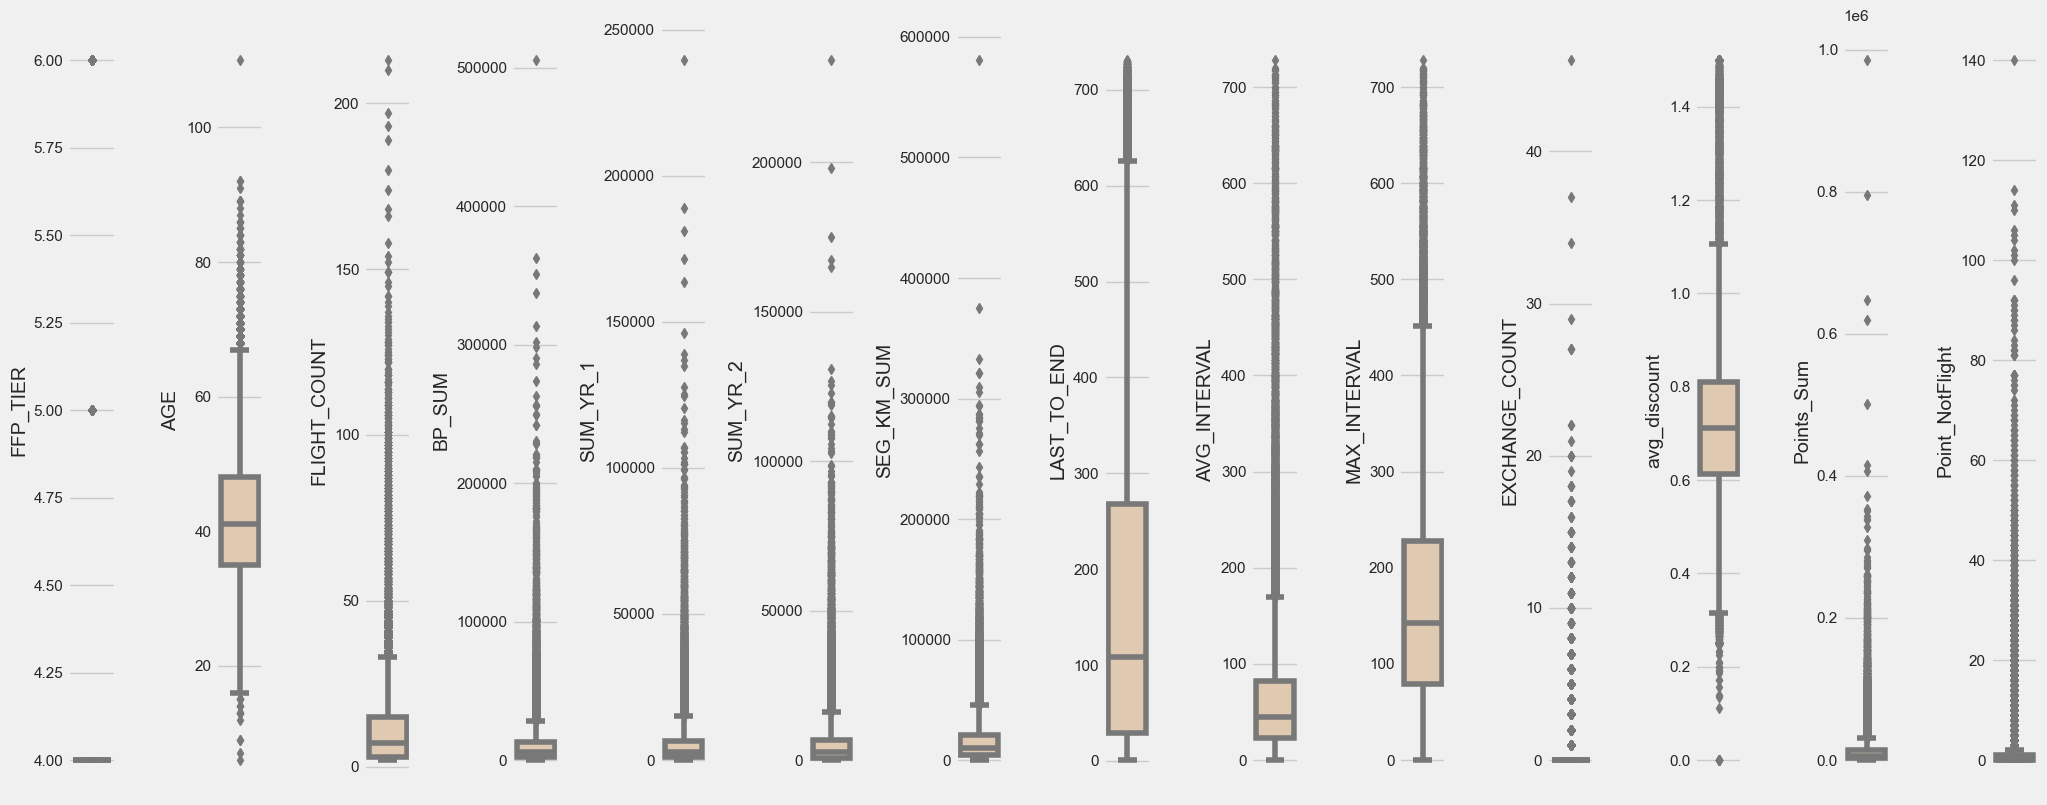

In [14]:
for i in range(0, len(num)):
    plt.subplot(1, len(num), i+1)
    sns.boxplot(y=df[num[i]], color = '#E7CBA9', data=df, orient = 'v')
    plt.tight_layout()

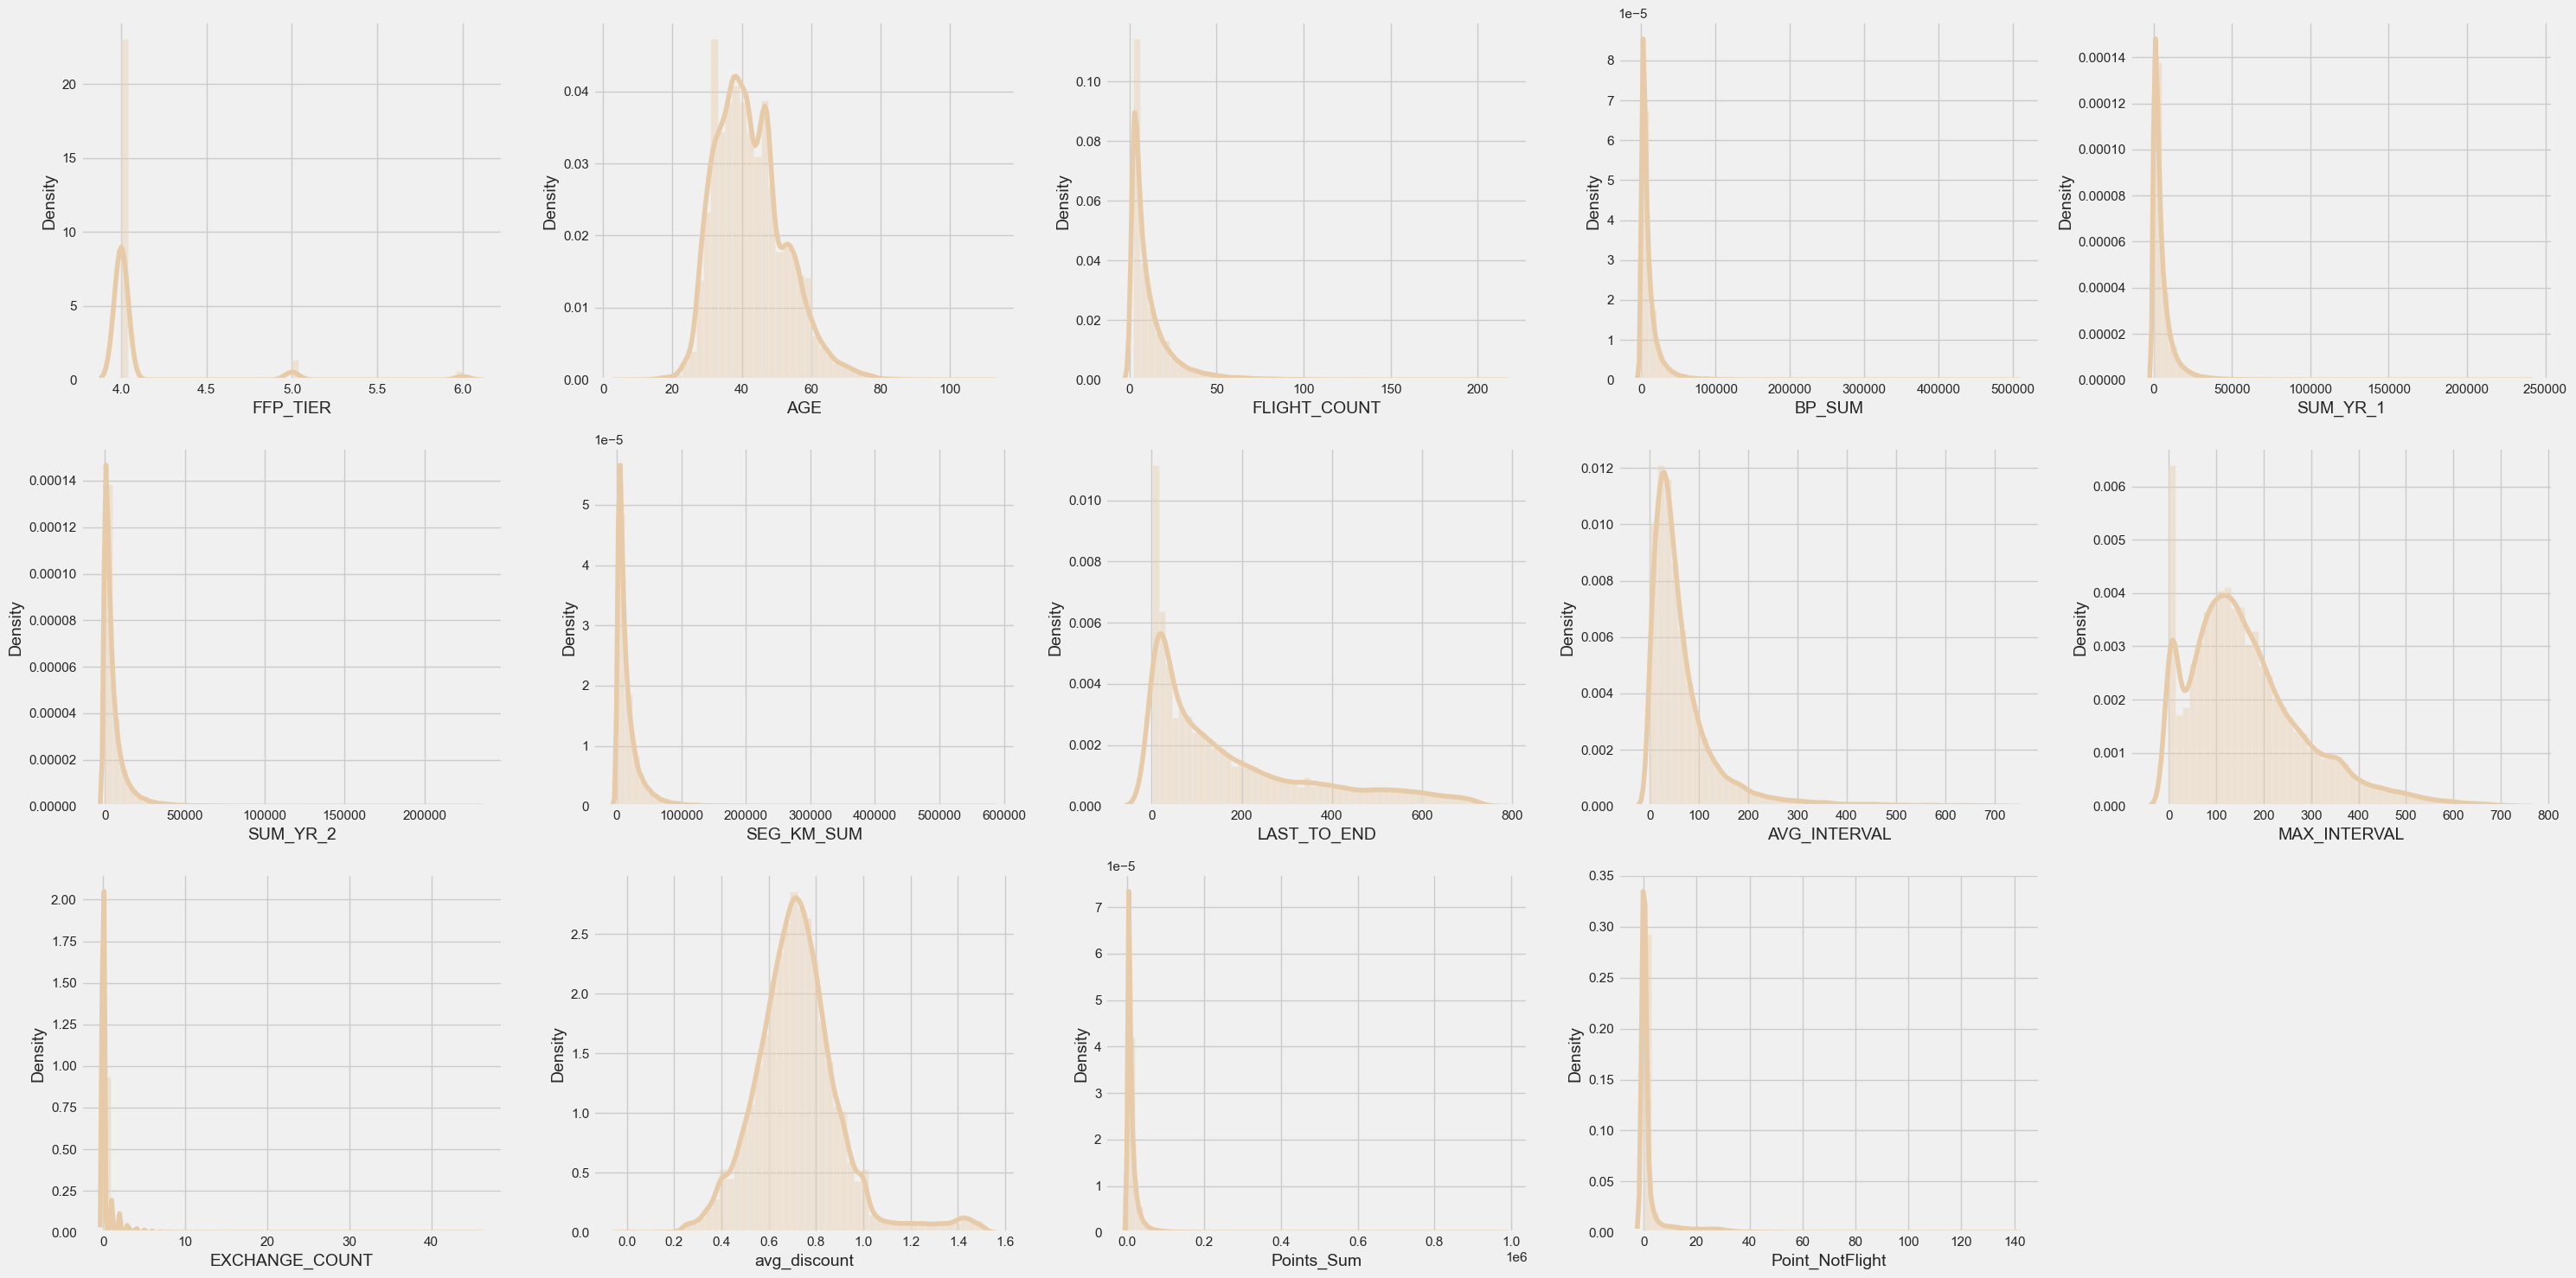

In [15]:
plt.figure(figsize=(30, 15))

k = int((len(num)+2)/3)
for i in range(0, len(num)):
    plt.subplot(3, k, i+1)
    sns.distplot(df[num[i]], color='#E7CBA9')
    plt.tight_layout()

**Observasi =**

rarta-rata data mempunyai outlierdan cenderung positive skewed.

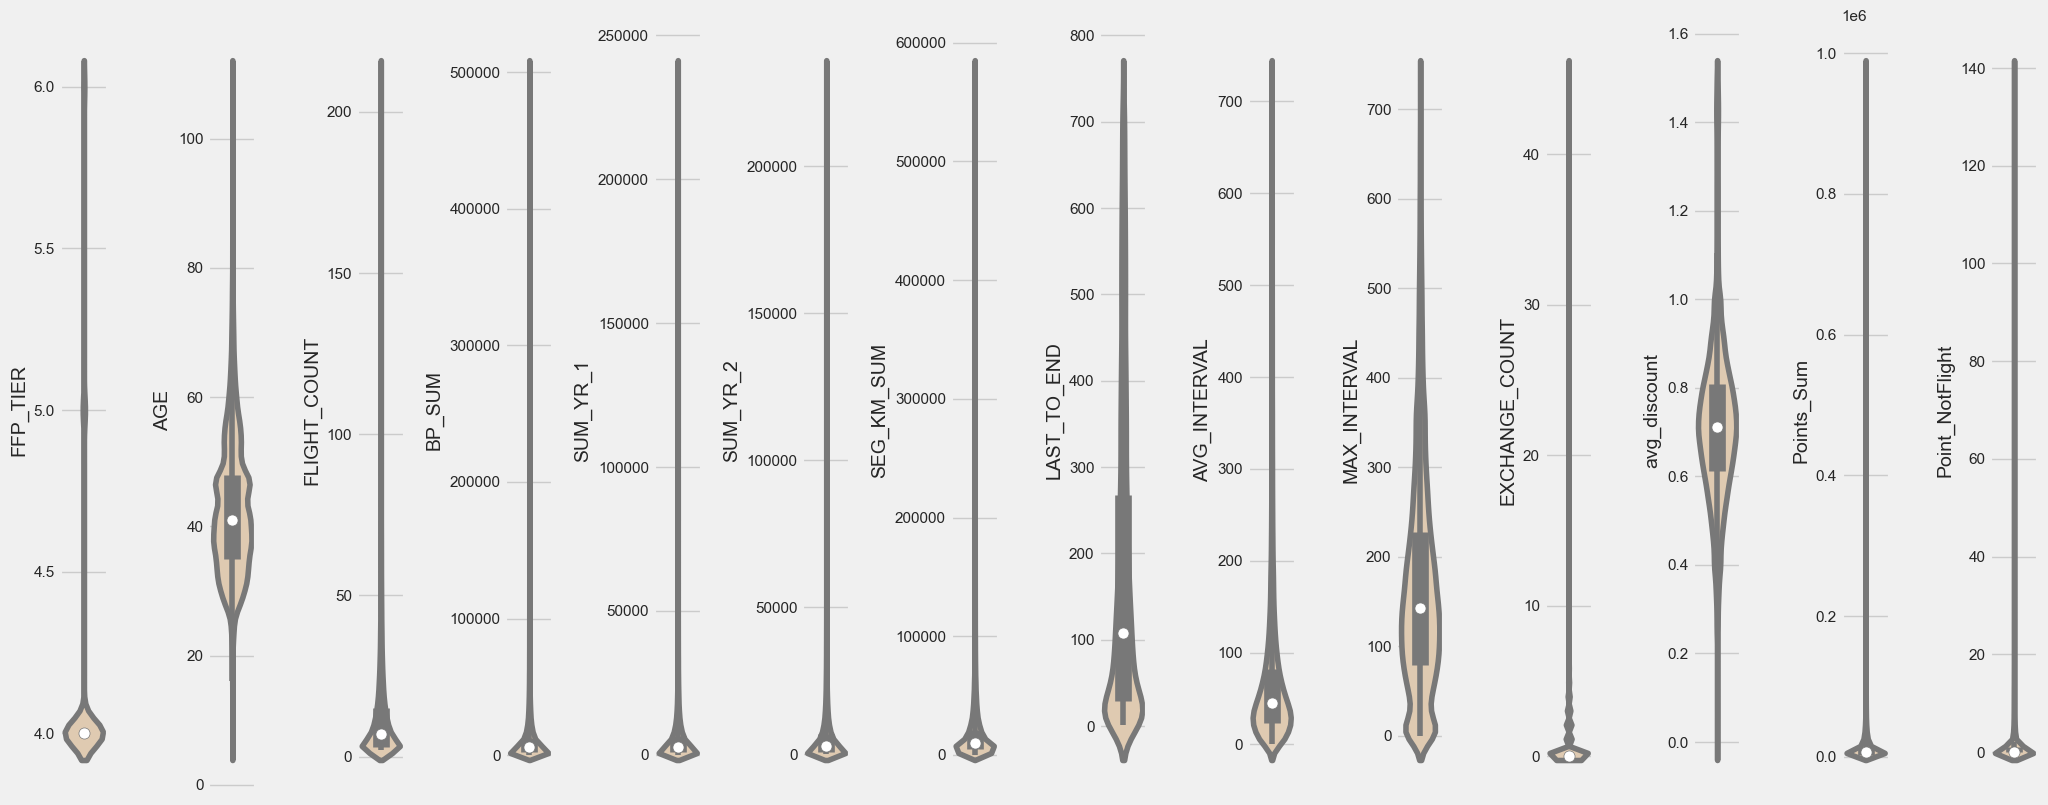

In [16]:
for i in range(0, len(num)):
    plt.subplot(1, len(num), i+1)
    sns.violinplot(y=df[num[i]], color='#E7CBA9', orient='v')
    plt.tight_layout()

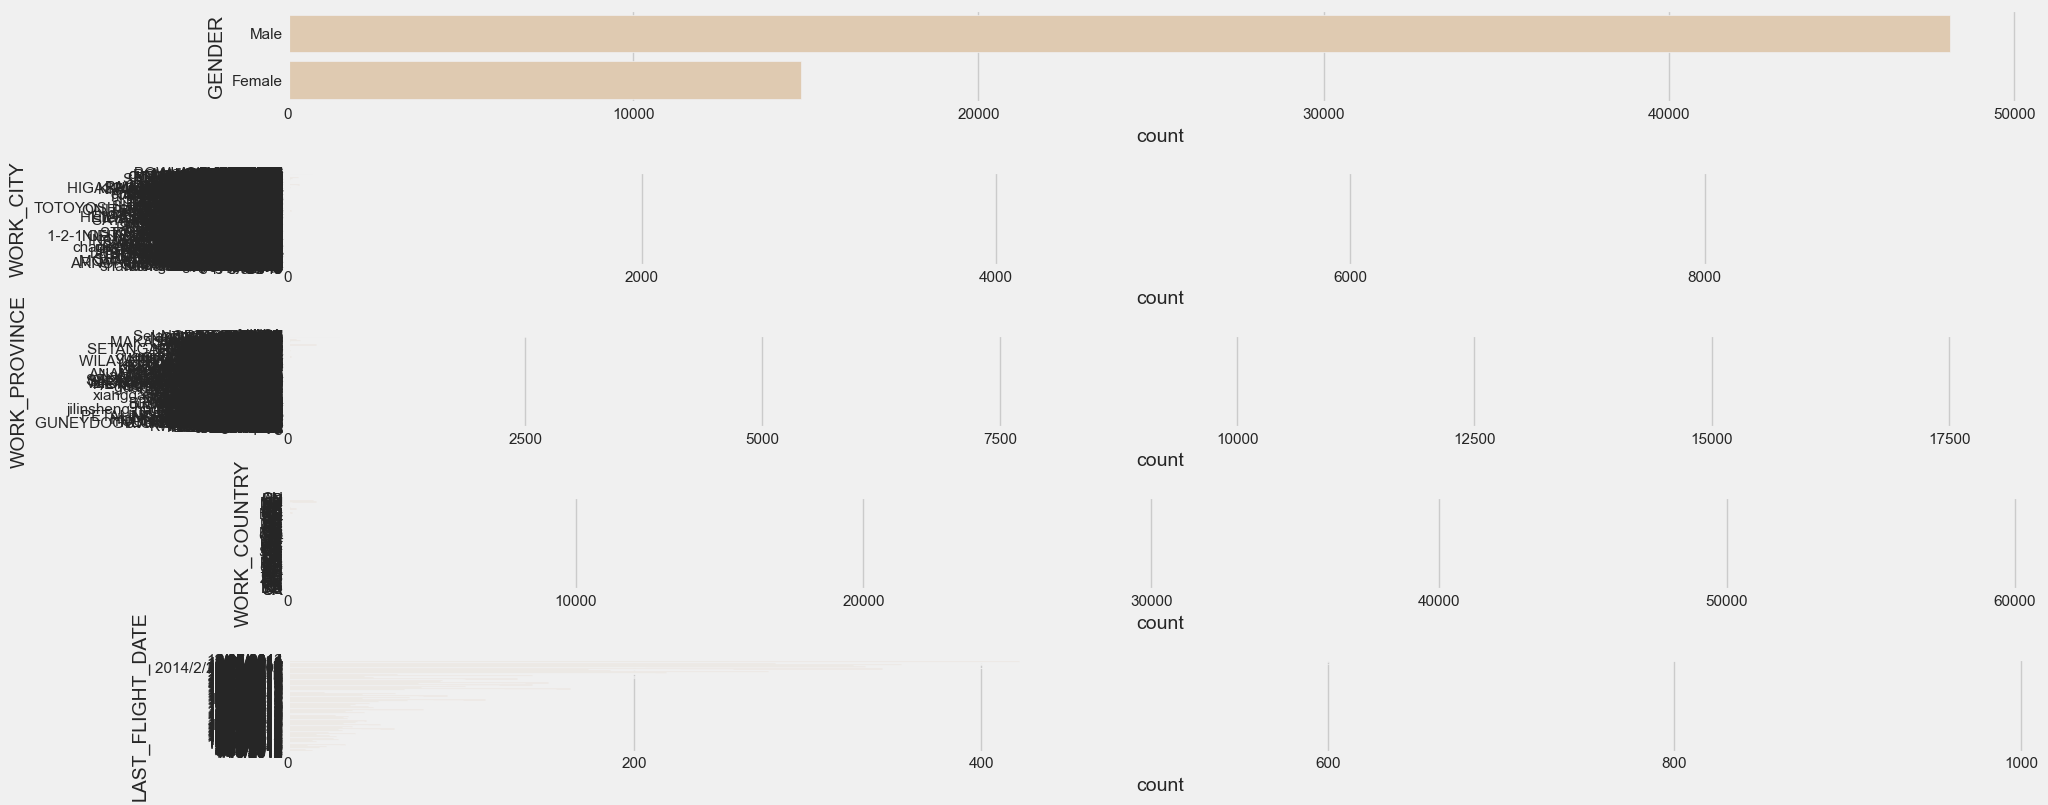

In [17]:
for i in range(0, len(cats)):
    plt.subplot(len(cats), 1, i+1)
    sns.countplot(y=df[cats[i]], color='#E7CBA9')
    plt.tight_layout()

# Multivariate Analysis

<Axes: >

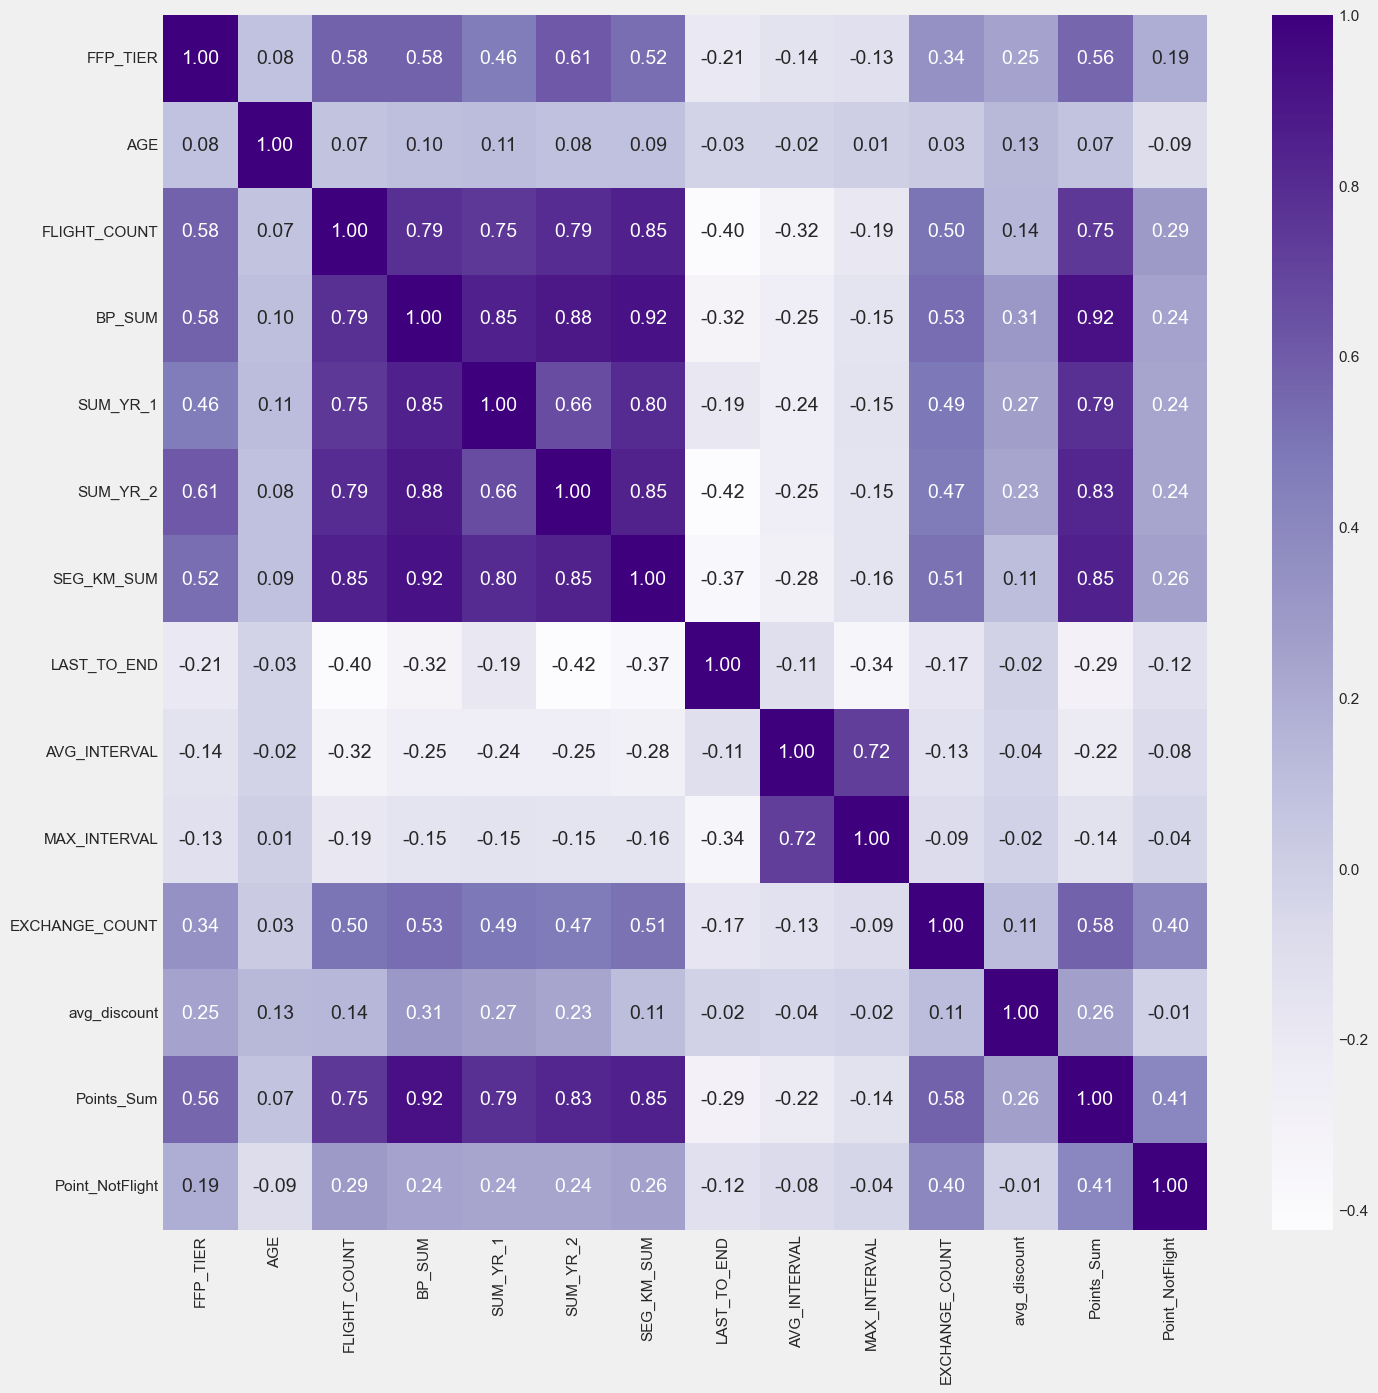

In [18]:
plt.figure(figsize=(15, 15))
sns.heatmap(df[num].corr(), cmap='Purples', annot=True, fmt='.2f')

# Data Cleansing

In [19]:
# Mengecek missing value ditiap fitur
x = df.shape[0]
missing_values_count = df.isnull().sum()
missing_values_count

MEMBER_NO               0
FFP_DATE                0
FIRST_FLIGHT_DATE       0
GENDER                  3
FFP_TIER                0
WORK_CITY            2269
WORK_PROVINCE        3248
WORK_COUNTRY           26
AGE                   420
LOAD_TIME               0
FLIGHT_COUNT            0
BP_SUM                  0
SUM_YR_1              551
SUM_YR_2              138
SEG_KM_SUM              0
LAST_FLIGHT_DATE        0
LAST_TO_END             0
AVG_INTERVAL            0
MAX_INTERVAL            0
EXCHANGE_COUNT          0
avg_discount            0
Points_Sum              0
Point_NotFlight         0
dtype: int64

In [20]:
# Menghitung besarnya missing value dibandingkan keseluruhan data di dataset
total_cells = np.product(df.shape)
total_missing = missing_values_count.sum()

percent_missing = round((total_missing/total_cells) * 100,2)
print(f'{percent_missing}%')

0.46%


In [21]:
# Imputasi fitur numerik yang memiliki nilai NULL/NaN
df['AGE'].fillna(df['AGE'].mean(), inplace=True)
df['SUM_YR_1'].fillna(df['SUM_YR_1'].mean(), inplace=True)
df['SUM_YR_2'].fillna(df['SUM_YR_2'].mean(), inplace=True)

In [22]:
# Imputasi fitur kategorik yang memiliki nilai NULL/NaN
df['WORK_CITY'].fillna(df['WORK_CITY'].mode()[0], inplace=True)
df['WORK_PROVINCE'].fillna(df['WORK_PROVINCE'].mode()[0], inplace=True)
df['WORK_COUNTRY'].fillna(df['WORK_COUNTRY'].mode()[0], inplace=True)

# Data Duplicate

In [23]:
df.duplicated().sum()

0

In [24]:
df.duplicated(subset=['MEMBER_NO'],keep=False).sum()

0

# Outlier

In [25]:
for k in num:
 if k not in ['FPP_TIER', 'AGE', 'avg_discount']:
  df[k] = np.log(df[k] + (df[df[k] > 0][k].min() / 2)) # kita harus pastikan data tidak 0 untuk dilogtransform

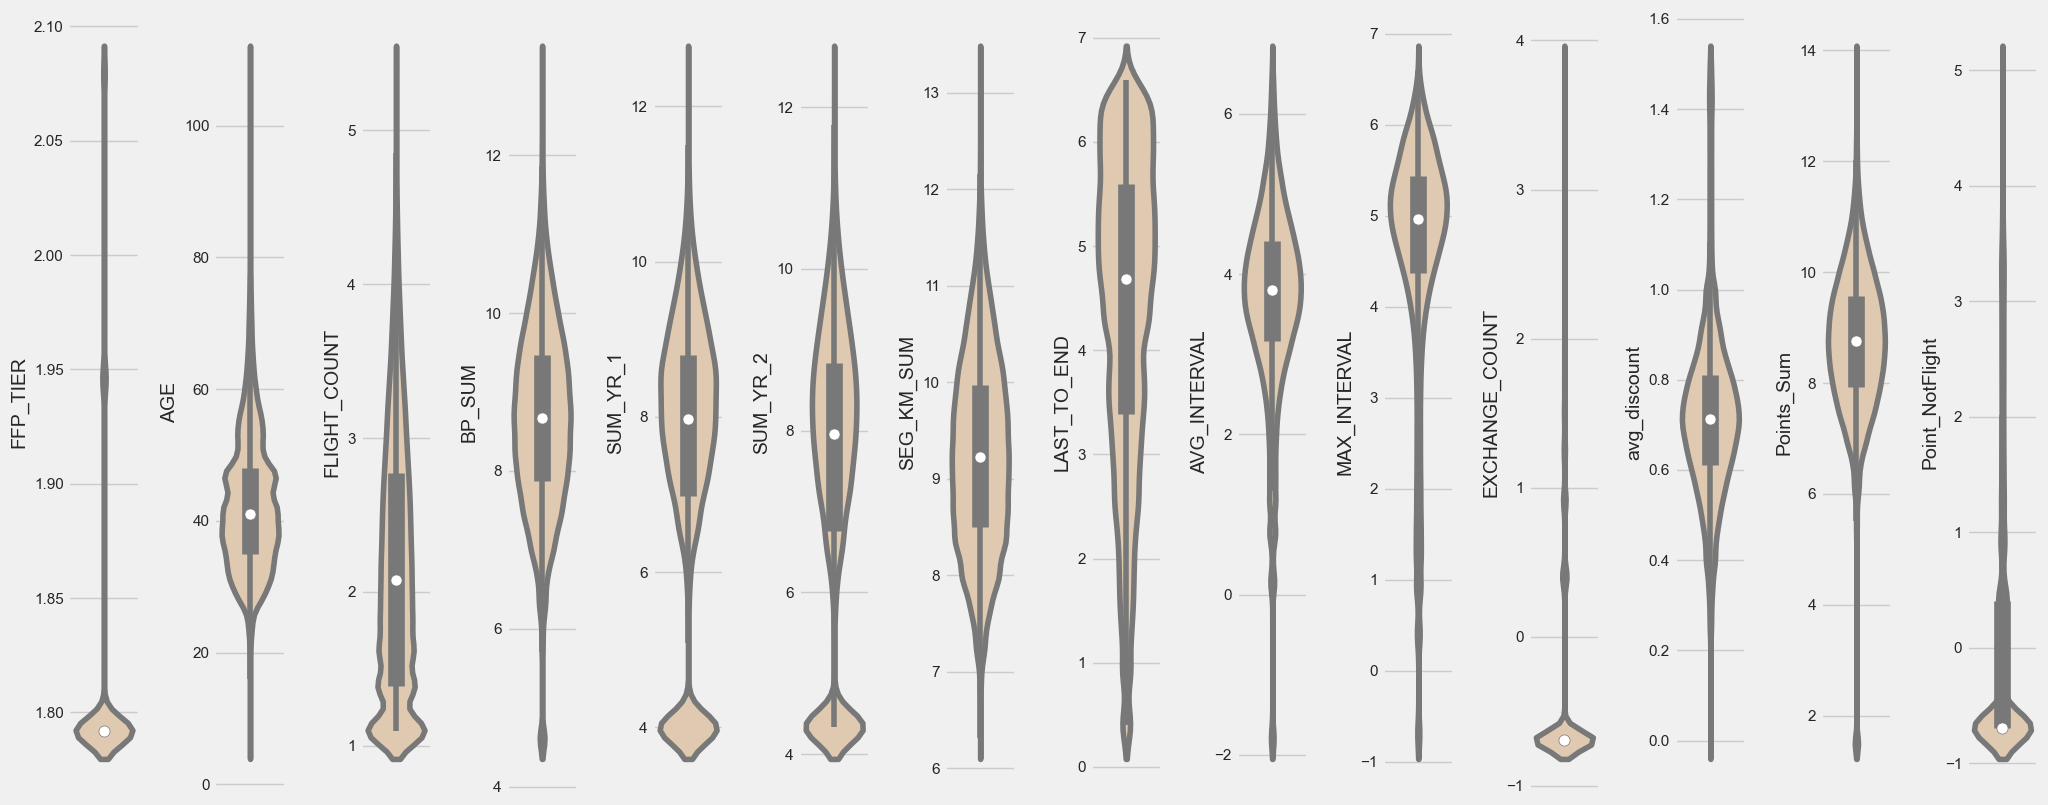

In [26]:
for i in range(0, len(num)):
    plt.subplot(1, len(num), i+1)
    sns.violinplot(y=df[num[i]], color='#E7CBA9', orient='v')
    plt.tight_layout()

In [27]:
print("Before removing outlier: ", len(df))

for n in num:
  if n not in ['FPP_TIER', 'AGE', 'avg_discount']:
    z_scores = np.abs(stats.zscore(df[n]))
    df = df[z_scores <= 3]

print("After removing outlier: ", len(df))

Before removing outlier:  62988
After removing outlier:  55341


# Feature Engineering

In [28]:
#karena kolom "LAST_FLIGHT_DATE" ada yang eror, kita menggunakan errors='coerce', karena dia bakal skip error dan ganti datanya jadi NaT, lalu mengubah menjadi datetime
df["LAST_FLIGHT_DATE"] = pd.to_datetime(df["LAST_FLIGHT_DATE"], errors='coerce')
df[["FFP_DATE", "FIRST_FLIGHT_DATE","LOAD_TIME"]] = df[["FFP_DATE", "FIRST_FLIGHT_DATE","LOAD_TIME"]].apply(pd.to_datetime)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55341 entries, 149 to 62952
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   MEMBER_NO          55341 non-null  int64         
 1   FFP_DATE           55341 non-null  datetime64[ns]
 2   FIRST_FLIGHT_DATE  55341 non-null  datetime64[ns]
 3   GENDER             55339 non-null  object        
 4   FFP_TIER           55341 non-null  float64       
 5   WORK_CITY          55341 non-null  object        
 6   WORK_PROVINCE      55341 non-null  object        
 7   WORK_COUNTRY       55341 non-null  object        
 8   AGE                55341 non-null  float64       
 9   LOAD_TIME          55341 non-null  datetime64[ns]
 10  FLIGHT_COUNT       55341 non-null  float64       
 11  BP_SUM             55341 non-null  float64       
 12  SUM_YR_1           55341 non-null  float64       
 13  SUM_YR_2           55341 non-null  float64       
 14  SEG_

In [29]:
# Membuat feature untuk melihat customer yang lamanya bergabung 
df['COUNT_DAY_FLIGHT'] = df['LOAD_TIME'] - df['FFP_DATE']
df['COUNT_DAY_FLIGHT'] = df['COUNT_DAY_FLIGHT'].dt.days

In [30]:
feats = ['COUNT_DAY_FLIGHT', 'LAST_TO_END', 'FLIGHT_COUNT', 'SEG_KM_SUM', 'avg_discount']
df_feat = df[feats]
df_feat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55341 entries, 149 to 62952
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   COUNT_DAY_FLIGHT  55341 non-null  int64  
 1   LAST_TO_END       55341 non-null  float64
 2   FLIGHT_COUNT      55341 non-null  float64
 3   SEG_KM_SUM        55341 non-null  float64
 4   avg_discount      55341 non-null  float64
dtypes: float64(4), int64(1)
memory usage: 2.5 MB


In [31]:
# Melakukan standardisasi dengan StandardScaler
from sklearn.preprocessing import MinMaxScaler, StandardScaler

scaler = StandardScaler()
scaler.fit(df_feat)
x_std = scaler.transform(df_feat)
df_std = pd.DataFrame(x_std, columns = df_feat.columns)

# Modeling

## K-Means Clustering

In [32]:
inertia = []

for i in range(1,11):
    kmeans = KMeans(n_clusters = i, random_state = 42)
    kmeans.fit(df_std)
    inertia.append(kmeans.inertia_)

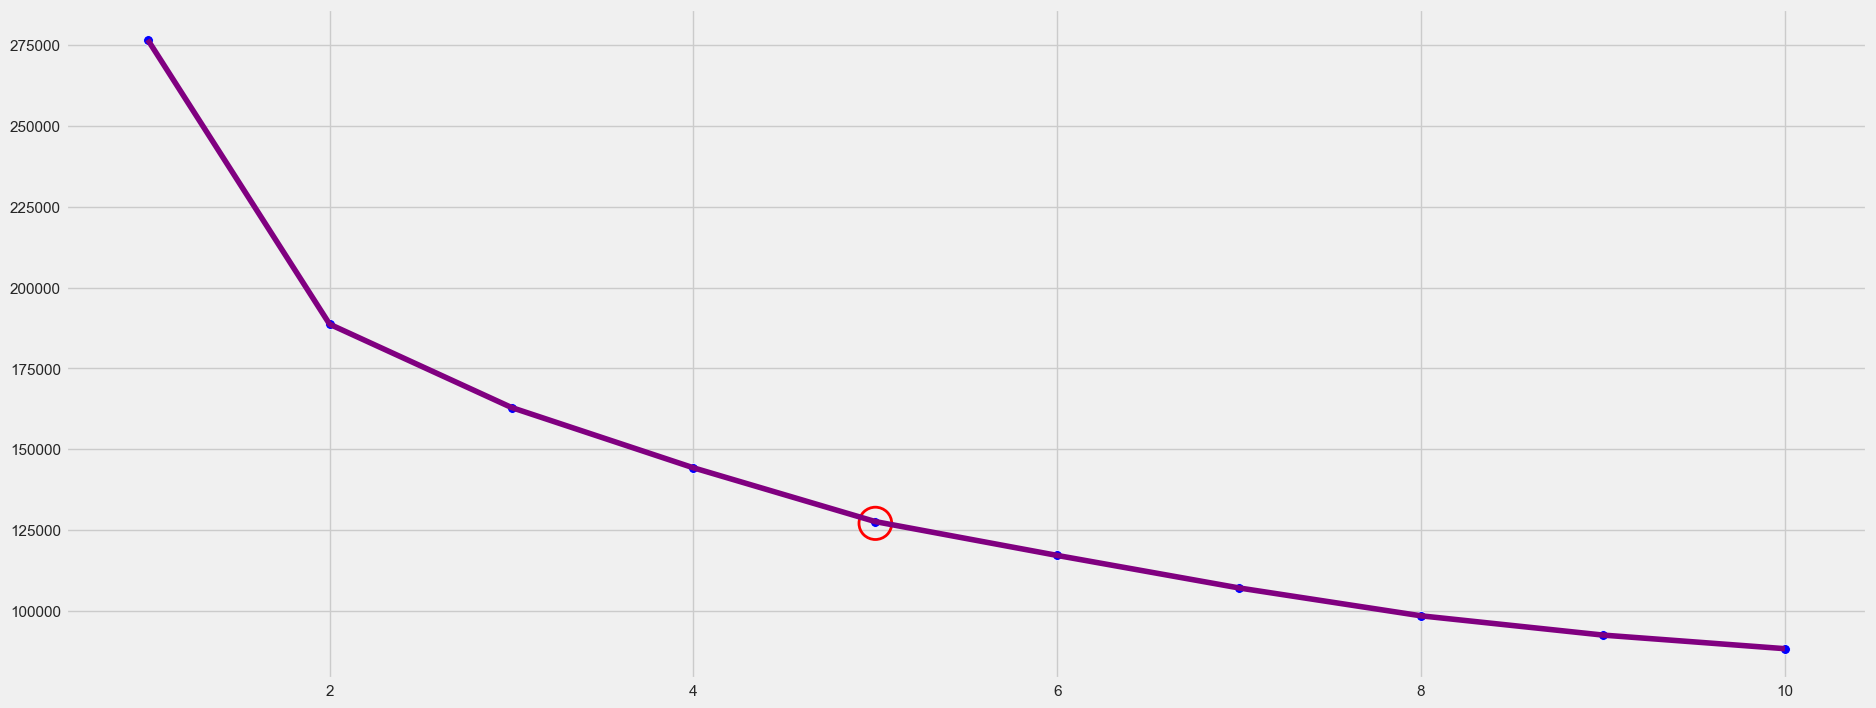

In [33]:
from matplotlib import patches
from matplotlib.patches import Ellipse

sns.lineplot(x=range(1,11), y = inertia, color = 'purple')
sns.scatterplot(x=range(1,11), y = inertia, s = 50, color = 'blue')
circle = patches.Ellipse((5, 127000), width=0.18, height=10000, color='red', fill=False, linewidth=2)
plt.gca().add_patch(circle)
plt.gca().autoscale_view()
plt.show()

In [34]:
round((pd.Series(inertia)/pd.Series(inertia).shift(-1))/pd.Series(inertia)*100,5)

0    0.00053
1    0.00061
2    0.00069
3    0.00078
4    0.00085
5    0.00093
6    0.00102
7    0.00108
8    0.00113
9        NaN
dtype: float64

Dapat dilihat dari evaluasi inertia n cluster dengan perubahan inertia yang signifikan adalah 5.

In [35]:
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(df_std)
df_std['Labels'] = kmeans.labels_
df_std.sample(5)

COUNT_DAY_FLIGHT  LAST_TO_END  FLIGHT_COUNT  SEG_KM_SUM  avg_discount  \
9859           1.884335    -2.414476      0.994209    1.071227     -0.300834   
47815          0.828376     0.404233     -1.378188   -1.232796      0.036728   
3598          -0.963880    -1.755046      2.177677    1.450458      0.539128   
17728         -0.984233    -2.182266     -0.079511    0.728045     -0.789678   
37417         -1.029728     0.535075     -0.460420   -0.263242     -1.030482   

       Labels  
9859        2  
47815       4  
3598        2  
17728       1  
37417       0

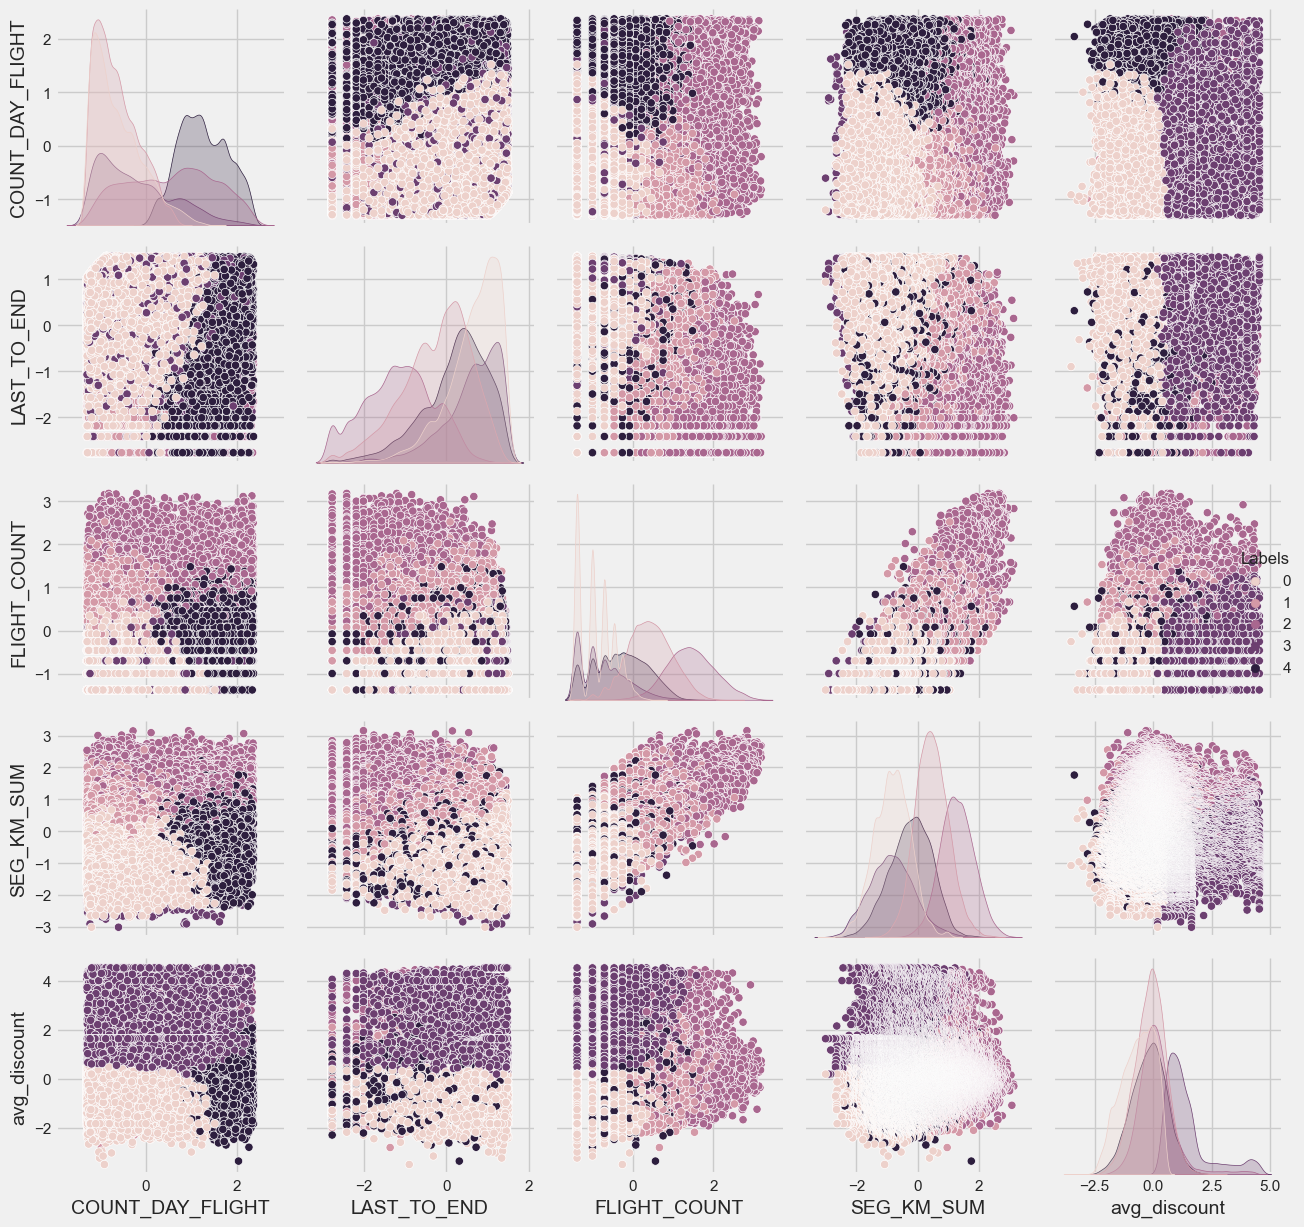

In [36]:
sns.pairplot(data=df_std, hue='Labels', diag_kind='kde')
plt.tight_layout()

## PCA

In [37]:
# Memisahkan dataframe Labels
y = pd.DataFrame(df_std['Labels'].values, columns=['Labels'])

In [38]:
# Melakukan PCA
pca = PCA(n_components=2)

pca.fit(df_std)
pcas = pca.transform(df_std)

# Mengubah hasil pca ke dataframe
df_pca = pd.DataFrame(data = pcas, columns = ['PC1', 'PC2'])
df_pca.describe()

PC1           PC2
count  5.534100e+04  5.534100e+04
mean   6.573750e-17 -6.573750e-17
std    1.666373e+00  1.477567e+00
min   -3.500392e+00 -3.742682e+00
25%   -1.189508e+00 -1.128877e+00
50%    1.248066e-02 -1.150124e-02
75%    1.464521e+00  1.145163e+00
max    3.517968e+00  4.592318e+00

In [39]:
# Menggabungkan dataframe df_pca dan y
df_pca['Labels'] = y
df_pca.sample(5)

PC1       PC2  Labels
53656 -2.514875 -1.310751       0
2649   2.672717  2.195536       2
1971   1.519515  2.556867       2
21227 -0.777189  0.511500       1
23776 -0.658886  0.585088       1

Text(0.5, 1.0, 'Customer Segmentation Based on LRFMC Model')

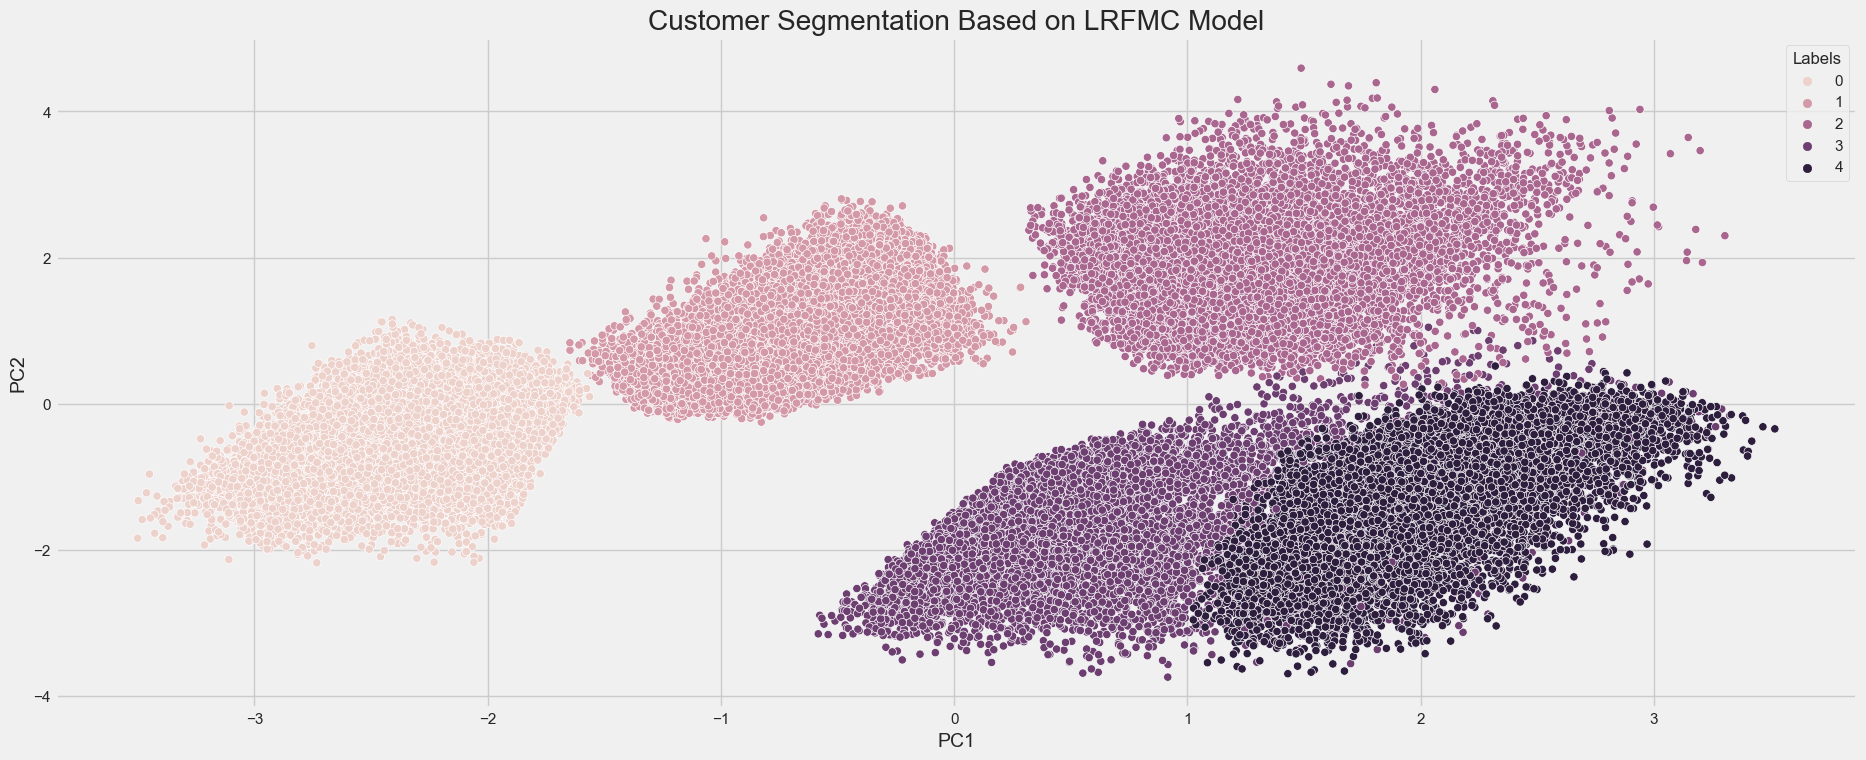

In [40]:
sns.scatterplot(data=df_pca, x="PC1", y="PC2", hue="Labels")
plt.title('Customer Segmentation Based on LRFMC Model')

In [41]:
df_feat['Labels'] = kmeans.labels_
df_feat.groupby('Labels').agg(['mean', 'median'])

COUNT_DAY_FLIGHT         LAST_TO_END           FLIGHT_COUNT            \
                   mean  median        mean    median         mean    median   
Labels                                                                         
0            931.528186   825.0    5.352779  5.554896     1.458743  1.386294   
1            909.511136   836.0    4.063676  4.255613     2.450212  2.484907   
2           1908.797183  1969.0    2.751293  2.803360     3.219937  3.218876   
3           1270.942802  1125.0    5.284022  5.493059     1.589746  1.609438   
4           2504.012530  2471.0    4.711764  4.901564     1.911170  1.945910   

       SEG_KM_SUM            avg_discount            
             mean     median         mean    median  
Labels                                               
0        8.481637   8.490028     0.600918  0.613313  
1        9.657554   9.641278     0.695327  0.699847  
2       10.408756  10.394519     0.743160  0.727041  
3        8.472343   8.458398     0.963373  0.910000  
4        9.035703   9.065315     0.685345  0.690513

# Summary

- `Labels 0` merupakan customer yang memiliki rata-rata jumlah penerbangan paling rendah (1.4) dan median hari tergabung sebagai member terendah (825 hari).
- `Labels 1` merupakan customer yang memiliki rata-rata jumlah penerbangan sedang (2.4), akan tetapi rata-rata jarak penerbangan yang ditempuh cukup tinggi (9.6 km).
- `Labels 2` merupakan customer yang memiliki rata-rata jumlah penerbangan paling tinggi (3.2),  dan rata-rata jarak penerbangan paling tinggi (10.4 km).
- `Labels 3` merupakan customer dengan rata-rata jumlah penerbangan cukup rendah (1.6), dan juga jarak yang ditenmpuh terendah akan tetapi tidak berbeda jauh dengan Labels 2 (8.4)
- `Labels 4` merupakan customer yang rata-rata telah mendaftar sebagai member cukup lama (2504 hari), akan tetapi rata-rata jumlah penerbangannya cukup rendah (1.9).

# Business Recomendation

Dapat memberi diskon tambahan untuk customer yang sudah lama menjadi member di labels 3 untuk 
meningkatkan jumlah penerbangan yang rendah